Chapter 1, paragraph 1

Measures of central tendency

1.1 - the arithmetic mean


When we talk about statistics, the most natural starting point for the journey is the arithmetic mean. As every simple concept, it is very powerfull and it is something that - trascending the statistics - we, as social animals, have to deal with daily. Don't we always have in mind an "average something" against which all the rest is compared? But aside from this digression, from a statistical perspective the mean is the most natural and straight forward way to describe a complex phenomenom. Imagine you have to answer the question: in the four largest European countries, are women or men the more frequent investor in adult education? Let's see how to answer this question using data from the OECD.

In [40]:
#https://sdmx.herokuapp.com/OECD/dataflow
import pandas as pd
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import getpass

if getpass.getuser() == 'simon':
    functionFolder = 'C:/Users/simon/Desktop/github_projects/hands_on_statistics/zz_help_functions/'
else:
    functionFolder = '/Users/tugbasabanoglu/Desktop/hands_on_statistics/'

sys.path.insert(1, functionFolder)
from database_connection_functions import get_from_oecd


# Let's load the dataset and narrow it down to the values we are interested in

adult_education_df = get_from_oecd('EAG_AL_26092022')
adult_education_df = adult_education_df[(adult_education_df['COUNTRY'].isin(['AUT', 'BEL', 'CZE', 'DEN', 'DNK', 'EST',
                                                                             'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL',
                                                                             'ITA', 'LVA', 'LTU', 'LUX', 'NLD', 'POL',
                                                                             'PRT', 'SVK', 'SVN', 'ESP', 'SWE', ])) & 
                                        (adult_education_df['AGE'] == 'T') & 
                                        (adult_education_df['MEASURE'] == 'VALUE') & 
                                        (adult_education_df['INDICATOR'] == 'AES_AL_PART_FNFAET') &
                                        (adult_education_df['ISC11A'] == 'T')].reset_index(drop = True)

adult_education_mean_df = adult_education_df.groupby(['Gender']).agg({'Value': 'mean'}).reset_index(drop = False)
adult_education_mean_df['Value'] = adult_education_mean_df['Value'].round(2)
adult_education_mean_df


,Gender,Value
0,Men,45.91
1,Total,46.82
2,Women,47.86


Women do seem to be, on average in the EU countries, make use of adult education more than men. 47.86% of women against 45.91% of men. 
Is this a piece of knowledge we can really make use for? Usually, the best way to make use of the arithmetic mean is to show it in contrast to the single datapoints that generated them. And here is where data visualization becomes a powerfull tool and ally. Let's continue the example from above to see how.

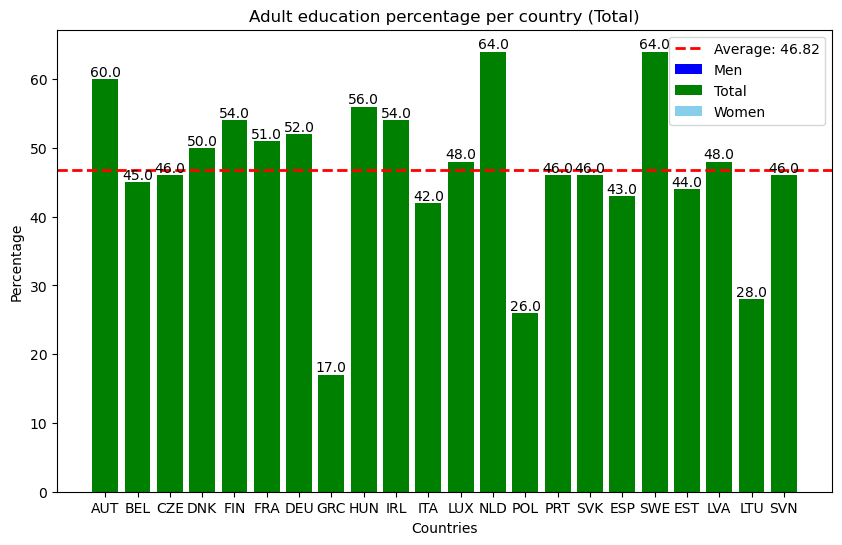

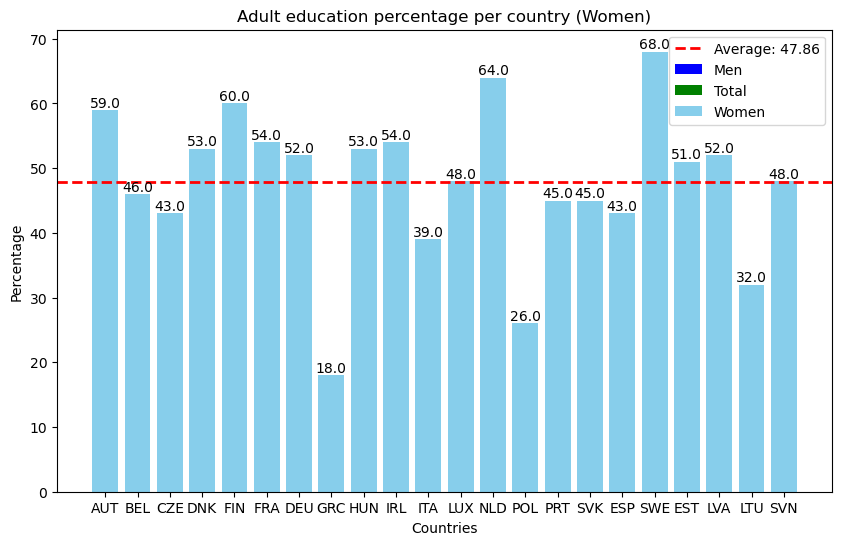

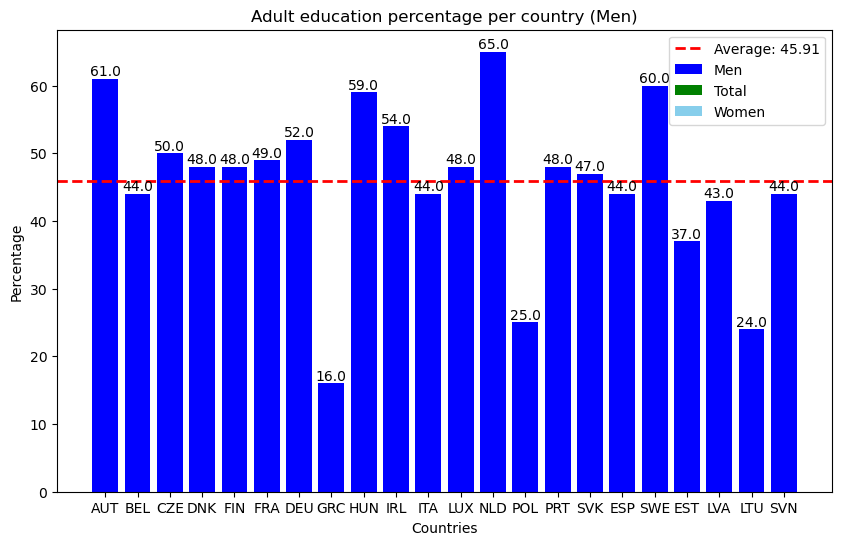

In [47]:
for gdr in ['Total', 'Women', 'Men']:

    adult_education_red = adult_education_df.copy(deep = True)
    adult_education_red = adult_education_red[adult_education_red['Gender'] == gdr].reset_index(drop = True)

    countries = adult_education_red['COUNTRY']
    education_pct = adult_education_red['Value']
    genders = adult_education_red['Gender']

    group_colors = {
        'Men': 'blue',
        'Total': 'green',
        'Women': 'skyblue'
    }

    plt.figure(figsize = (10, 6))

    bar_colors = [group_colors[gender] for gender in genders]

    bars = plt.bar(countries, 
                education_pct, 
                color = bar_colors)

    for group, color in group_colors.items():
        plt.bar(0, 
                0, 
                color = color, 
                label = group) 

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, 
                 height, 
                 f'{height}', 
                 ha='center', 
                 va='bottom')

    plt.axhline(y = np.mean(education_pct), 
                color='red', 
                linestyle='--', 
                linewidth=2, 
                label=f'Average: {np.mean(education_pct):.2f}')

    plt.xlabel('Countries')
    plt.ylabel('Percentage')
    plt.title('Adult education percentage per country (' + gdr + ')' )
    plt.legend()

    plt.show()

Knowing what is the average when looking again at our population helps us with putting the datapoints into perspective. In our example, it appears very evidendent that Greece, Poland, and Lithuania have quite a gap to bridge in terms of usage of adult education. On the contrary, the Netherlands, Austria, and Sweden are positively outperforming the rest of the EU countries. Also interesting is to see that, in all cases, when one country is above/below the Total average, then it is also above/beyond the average by gender. In other words, there is no country "doing very well" for one gender and "more poorly" for the other.

Putting the observations in the context of their average also allowed us to see something else. The fact that few countries are "way below" average and some other "way above" makes evident how the average is sensitive to the more extreme values. Let's continue with this example to see how we can mitigate this issue.